In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [67]:
customer_data=pd.read_csv('/content/Mall_Customers.csv')

In [68]:
customer_data.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [69]:
customer_data.shape

(200, 5)

In [70]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [71]:
customer_data.isnull().sum()  #to check missing values

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [72]:
#choosing anual income and spending score
X=customer_data.iloc[:,[3,4]]

In [73]:
X

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [74]:
#to choose number of clusters
#we will use wcss


Within cluster sum of squares

In [75]:
wcss=[]


for i in range(1,11):
  kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
  kmeans.fit(X)

  wcss.append(kmeans.inertia_)


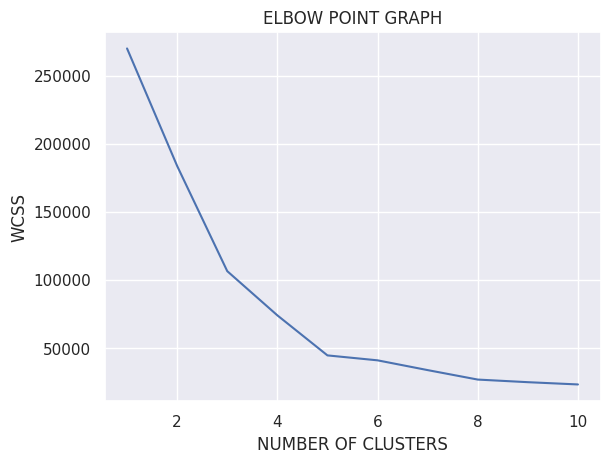

In [76]:
#plotting an elbow graph
sns.set()
plt.plot(range(1,11),wcss)
plt.title('ELBOW POINT GRAPH')
plt.xlabel('NUMBER OF CLUSTERS')
plt.ylabel('WCSS')
plt.show()

In [77]:
#no sharp drop after 5 therefore number of clusters is 5

In [78]:
kmeans=KMeans(n_clusters=5,init='k-means++',random_state=0)
#return a label for each data point
Y=kmeans.fit_predict(X)
print(Y)

[3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3
 4 3 4 3 4 3 0 3 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 2 1 0 1 2 1 2 1 0 1 2 1 2 1 2 1 2 1 0 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1]


VISUALISING ALL CLUSTERS

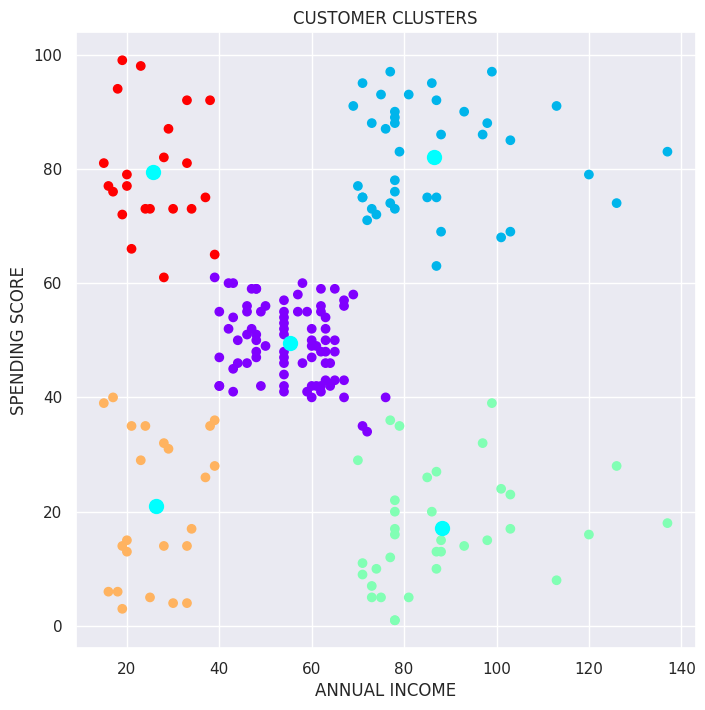

In [81]:
#plotting all clusters and their centroids
plt.figure(figsize=(8,8))
plt.scatter(X.iloc[:,0],X.iloc[:,1], c=kmeans.labels_,cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='cyan', label='CENTROID')
plt.title('CUSTOMER CLUSTERS')
plt.xlabel('ANNUAL INCOME')
plt.ylabel('SPENDING SCORE')
plt.show()